# Book Title: Bayesian Analysis with Python (2nd Version)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
cd drive/My Drive/class20232/AI/AI_part2

/content/drive/My Drive/class20232/AI/AI_part2


# Chapter 1: Thinking Probabilistically - A Bayesian Inference Primer

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
palette = 'muted'
sns.set_palette(palette); sns.set_color_codes(palette)
figsize=(9, 7)
plt.style.use('seaborn-darkgrid')

<ipython-input-11-1a96645b6c4e>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


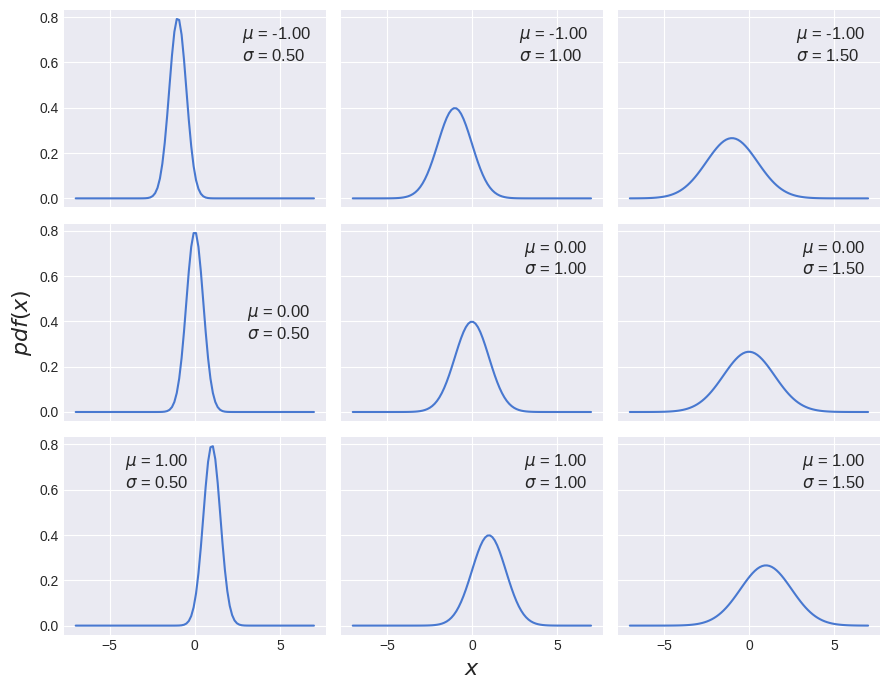

In [12]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 100)
f, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True, figsize=(9, 7))
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0,
        label="$\\mu$ = {:3.2f}\n$\\sigma$ = {:3.2f}".format(mu, sd), alpha=0)
        ax[i,j].legend(fontsize=12)
ax[2,1].set_xlabel('$x$', fontsize=16)
ax[1,0].set_ylabel('$pdf(x)$', fontsize=16)
plt.tight_layout()
#plt.savefig('B04958_01_01.png', dpi=300, figsize=(5.5, 5.5))
plt.savefig('B04958_01_01.png', dpi=300)

iid: independently and identically distributed,

### non iid example

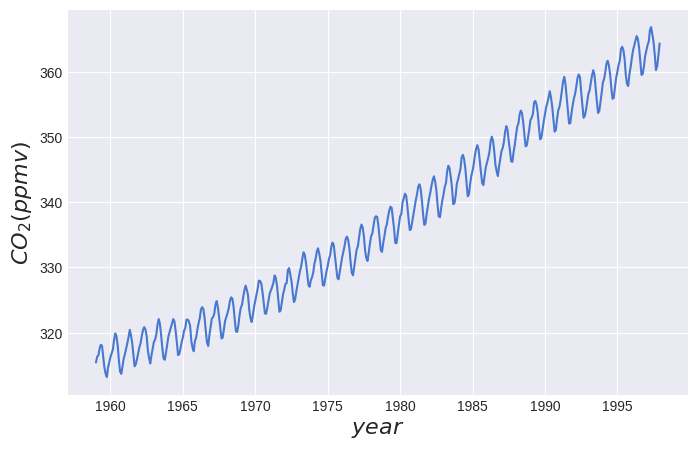

In [18]:
data = np.genfromtxt('data/mauna_loa_CO2.csv', delimiter=',') #하와이 마누아 로아 화산 대기중 CO2 농도(ppm/month)
plt.figure(figsize=(8,5))
plt.plot(data[:,0], data[:,1])
plt.xlabel('$year$', fontsize=16)
plt.ylabel('$CO_2 (ppmv)$', fontsize=16)
#plt.savefig('B04958_01_02.png', dpi=300, figsize=(5.5, 5.5))
plt.savefig('B04958_01_02.png', dpi=300)

# Bayes' theorem and statistical inference

* Bayes' theorem
$$ p(θ|D)= \frac{p(D|θ) p(θ)}{p(D)} $$           

<br><br>

$$ p(θ,D)= p(θ|D) p(D) $$          

$$ p(θ,D)= p(D|θ) p(θ) $$          

* If we reorder it,
$$ p(θ|D)= \frac{p(D|θ) p(θ)}{p(D)} $$           

Now, let's see what this formula implies and why it is important.   
First, **it says that $p(θ|D)$ is not necessarily the same as $p(D|θ)$.** This is a very important fact, one that's easy to miss in daily situations even for people trained in statistics and probability. Let's use a simple example to clarify why these quantities are not necessary the same. The probability of having two legs given these someone is a human is not the same as the probability of being a human given that someone has two legs. Almost all humans have two legs, except for people that have suffered from accidents or birth problems, but a lot of non-human animals have two legs, such as birds.   

If we replace $θ$ with hypothesis and $D$ with data, Bayes' theorem tells us how to compute the probability of a hypothesis $θ$ given the data $D$, and that's the way you will find Bayes' theorem explained in a lot of places. But, how do we turn a hypothesis into something that we can put inside Bayes' theorem? Well, we do that using probability distributions so, in general, our $θ$ will be a hypothesis in a very narrow sense. What we will be really doing is trying to find parameters of our models, that is, parameters of probability distributions. So maybe, instead of hypothesis, it is better to talk about models and avoid confusion. And by the way, don't try to set $θ$ to statements such  as "unicorns are real", unless you are willing to build a realistic probabilistic model of unicorn existence!

Since Bayes' theorem is central and we will use it over and over again, let's learn the names of its parts:  
* $p(θ)$: Prior   
* $p(D|θ)$: Likelihood
* $p(θ|D)$: Posterior
* $p(D)$: Evidence

The **prior distribution** should reflect what we know about the value of some parameter before seeing the data $D$. If we know nothing, we will use flat priors that do not convey too much information. In general, we can do better, as we will learn through this book. The use of priors is why some people still think Bayesian statistics is subjective, even when priors are just another assumption that we made when modeling and hence are just as subjective (or objective) as any other assumption, such as likelihoods.

The **likelihood** is how we will introduce data in our analysis. It is an expression of the plausibility of the data given the parameters.

The **posterior distribution** is the result of the Bayesian analysis and reflects all that we know about a problem (given our data and model). **The posterior is a probability distribution for the parameters in our model and not a single value.** This distribution is a balance of the prior and the likelihood.

There is a joke that says: A Bayesian is one who, vaguely expecting a horse, and catching a glimpse of a donkey, strongly believes he has seen a mule. One way to kill the mood after hearing this joke is to explain that if the likelihood and priors are both vague you will get a posterior reflecting vague beliefs about seeing a mule rather than strong ones. Anyway the joke captures the idea of a posterior being somehow a compromise between prior and likelihood. Conceptually, we can think of the posterior as the updated prior in the light of the data. In fact, the posterior of one analysis can be used as the prior of a new analysis after collecting new data. This makes Bayesian analysis particularly suitable for analyzing data that becomes available in sequential order.

The **evidence** is also known as marginal likelihood. Formally, **the evidence is the probability of observing the data averaged over all the possible values the parameters can take.** Anyway, for most of the parts of the book, **we will not care about the evidence, and we will think of it as a simple normalization factor.** This will not be problematic since we will only care about the relative values of the parameters and not their absolute ones. If we ignore the evidence, we can write Bayes' theorem as a proportionality:
$$p(θ|y)∝ p(y|θ)p(θ)$$           

Understanding the exact role of each term will take some time and will also require some examples, and that's what the rest of the book is for.

# Single parameter inference

## The coin-flipping problem

* We toss a coin a number of times and record how many heads and tails we get.  
* Based on this data we try to answer questions such as is the coin fair?   
* Or, more generally, how biased is the coin?

* The coin-flipping problem is **a great example** to learn the basic of Bayesian
statistics

* We will assume that we have already tossed a coin a number of times and we have
recorded the number of observed heads.

### The general model

* A coin with a bias of 1 will always land heads, one with a bias of 0 will always land tails.
* A coin with a bias of 0.5 will land half of the time heads and half of the time tails.
* To represent the bias, we will use the parameter θ, and to represent the total number of heads for an N number of tosses, we will use the variable y.

* According to Bayes' theorem we have the following formula:

$$p(θ|y)∝ p(y|θ)p(θ)$$           
   

* Notice that we need to specify which prior $p(θ)$ and likelihood $p(y|θ)$   
 we will use.   
* Let's start with the likelihood.

### Choosing the likelihood

* Let's assume that a coin toss does not affect other tosses, that is, we are assuming coin tosses are independent of each other.   
* Let's also assume that only two outcomes are possible, heads or tails.   

* I hope you agree these are very reasonable assumptions to make for our problem. Given these assumptions, a good candidate for the likelihood is the **binomial distribution**:
$$ p(y|θ)= \frac{N!}{y!(N-y)!} θ^y (1-θ)^{(N-y)}  $$         

This is a discrete distribution returning the probability of getting $y$ heads (or in general, success) out of $N$ coin tosses (or in general, trials or experiments) given a fixed value of $θ$ .

The following code generates 9 binomial distributions; each subplot has its own legend indicating the corresponding parameters:

In [19]:
n_params = [1, 2, 4]  # Number of trials
p_params = [0.25, 0.5, 0.75]  # Probability of success

x = np.arange(0, max(n_params)+1)

In [20]:
x

array([0, 1, 2, 3, 4])

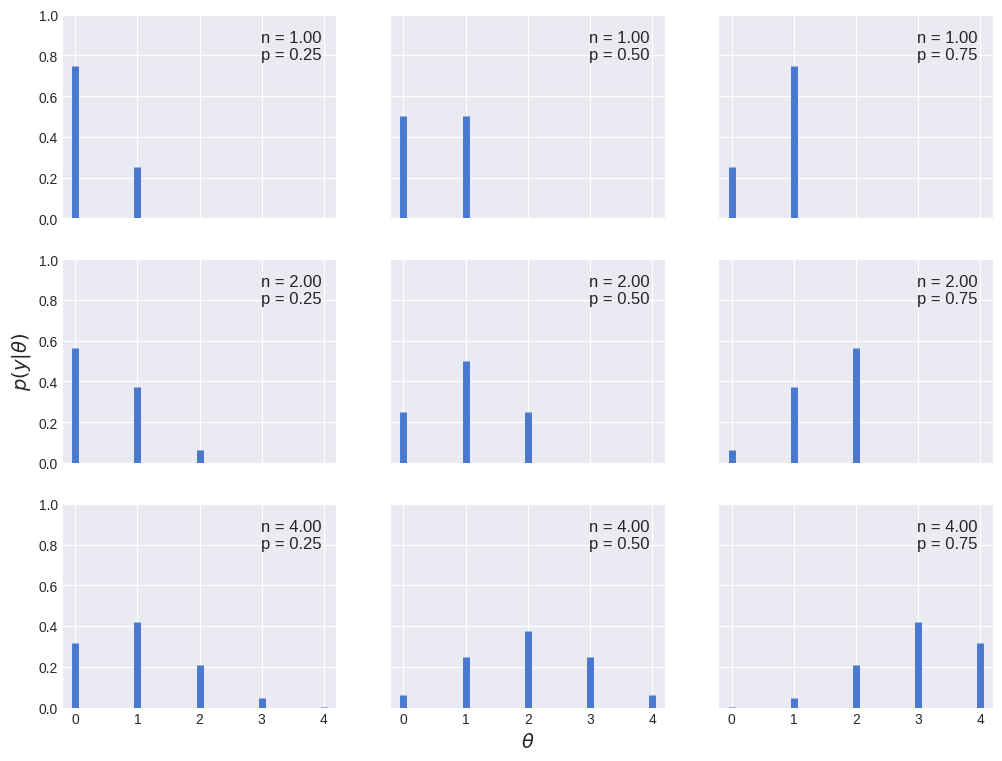

In [22]:
f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True,figsize=(12, 9))
for i in range(3):
    for j in range(3):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i,j].vlines(x, 0, y, colors='b', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="n = {:3.2f}\np = {:3.2f}".format(n, p), alpha=0)
        ax[i,j].legend(fontsize=12)
ax[2,1].set_xlabel('$\\theta$', fontsize=14)
ax[1,0].set_ylabel('$p(y|\\theta)$', fontsize=14)
ax[0,0].set_xticks(x)
plt.savefig('B04958_01_03.png', dpi=300)

The binomial distribution is also a reasonable choice for the likelihood. Intuitively, we can see that $θ$ indicates how likely it is that we will obtain a head when tossing a coin, and we have observed that event $y$ times. Following the same line of reasoning we get that $1 − θ$ is the chance of getting a tail, and that event has occurred $N-y$ times.

OK, so if we know $θ$ , the binomial distribution will tell us the expected distribution of heads. The only problem is that we do not know $θ$ ! But do not despair; in Bayesian statistics, every time we do not know the value of a parameter, we put  a prior on it, so let's move on and choose a prior.

#### Choosing the prior

As a prior we will use a **beta distribution**, which is a very common distribution in Bayesian statistics and looks like this:
$$  p(θ) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \cdot θ^{\alpha - 1} (1-θ)^{\beta -1}  $$

If we look carefully we will see that the beta distribution looks similar to the binomial except for the term with the $\Gamma$. This is the Greek uppercase gamma letter and represents what is known as gamma function. All that we care about at this point is that the first term is a normalization constant that ensures the distribution integrates to 1 and that the beta distribution has two parameters, $\alpha$ and $\beta$ , that control the distribution. Using the following code, we will explore our third distribution so far:

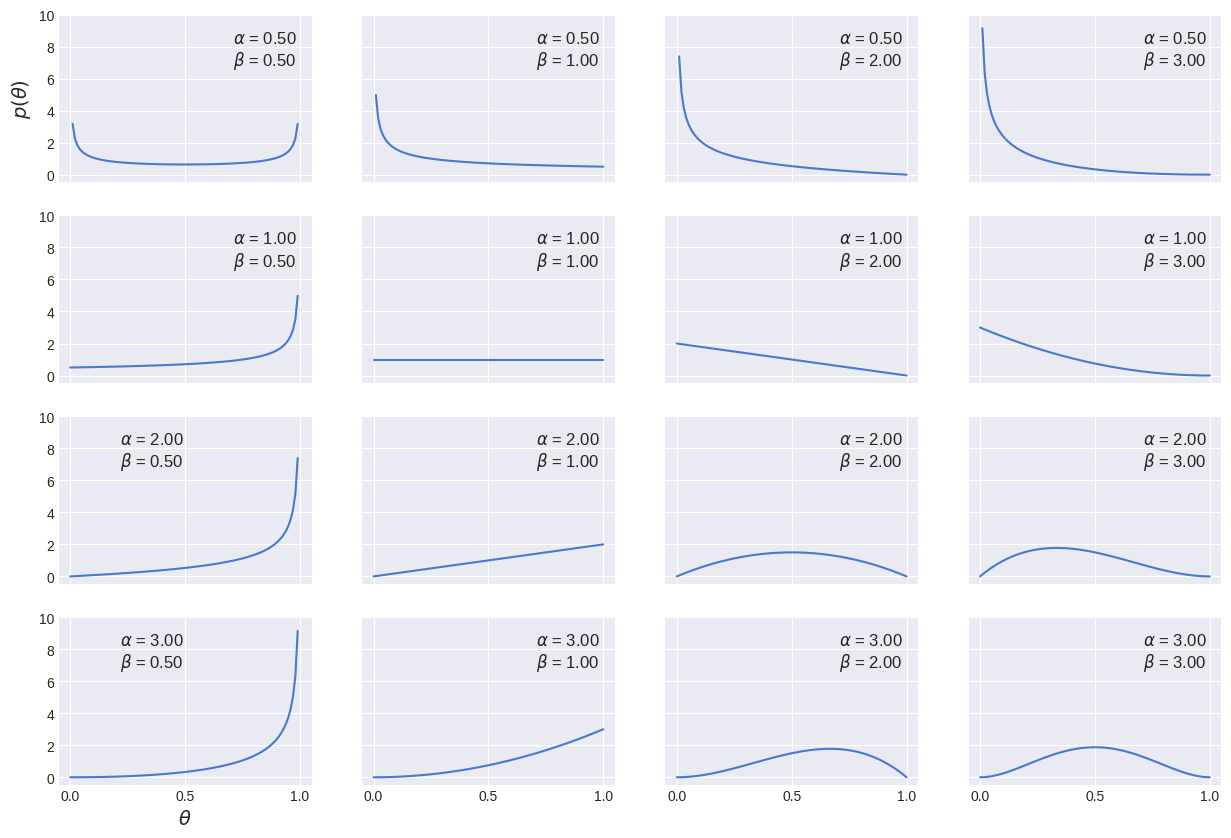

In [23]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True,figsize=(15, 10))
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i,j].legend(fontsize=12)

        ax[1,0].set_yticks([0,2,4,6,8,10])
ax[1,0].set_xticks([0, 0.5, 1])

ax[3,0].set_xlabel('$\\theta$', fontsize=14)
ax[0,0].set_ylabel('$p(\\theta)$', fontsize=14)
plt.savefig('B04958_01_04.png', dpi=300)

OK, the beta distribution is nice, but why are we using it for our model? There are many reasons to use a beta distribution for this and other problems.
* One of them is that the beta distribution is restricted to be between 0 and 1, in the same way our parameter $θ$ is.
* Another reason is its versatility. As we can see in the preceding figure, the distribution adopts several shapes, including a uniform distribution, Gaussian-like distributions, U-like distributions, and so on.
* A third reason is that the beta distribution is the conjugate prior of the binomial distribution (which we are using as the likelihood). A conjugate prior of a likelihood is a prior that, when used in combination with the given likelihood, returns a posterior with the same functional form as the prior. Untwisting the tongue, every time we use a beta distribution as prior and a binomial distribution as likelihood, we will get a beta as a posterior. There are other pairs of conjugate priors, for example, the Gaussian distribution is the conjugate prior of itself. For a more detailed discussion read https://en.wikipedia.org/wiki/Conjugate_prior.

For many years, Bayesian analysis was restricted to the use of conjugate priors. Conjugacy ensures mathematical tractability of the posterior, which is important given that a common problem in Bayesian statistics is to end up with a posterior we cannot solve analytically. This was a deal breaker before the development of suitable computational methods to solve any possible posterior. From the next chapter on, we will learn how to use modern computational methods to solve Bayesian problems whether we choose conjugate priors or not.

#### Getting the posterior

Let's remember Bayes' theorem says that the posterior is proportional to the likelihood times the prior:

$$p(θ|y)∝ p(y|θ)p(θ)$$           
   


So for our problem, we have to multiply the binomial and the beta distributions:

$$p(θ|y)∝ \frac{N!}{y!(N-y)!} θ^y (1-θ)^{(N-y)} \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} θ^{\alpha - 1} (1-θ)^{\beta -1}$$           


Now let's simplify this expression. To our practical concerns we can drop all the terms that do not depend on $θ$ and our results will still be valid. So we can write  the following:

$$p(θ|y)∝ θ^y (1-θ)^{(N-y)} θ^{\alpha - 1} (1-θ)^{\beta -1}$$   

Reordering it, we get the following:

$$p(θ|y)∝ θ^{\alpha - 1+y} (1-θ)^{\beta -1+N-y}$$   


If we pay attention, we will see that this expression has the same functional form of a beta distribution (except for the normalization) with $\alpha_{posterior} = \alpha_{prior}+ y$ and  $\beta_{posterior} = \beta_{prior} + N - y$, which means that the posterior for our problem is the  beta distribution:

$$p(θ|y)∝ Beta(\alpha_{prior} +y, \beta_{prior} + N - y)$$   



#### Computing and plotting the posterior

Now that we have the analytical expression for the posterior, let's use Python to compute it and plot the results. In the following code you will see there is actually one line that computes the results while the others are there just to plot them:

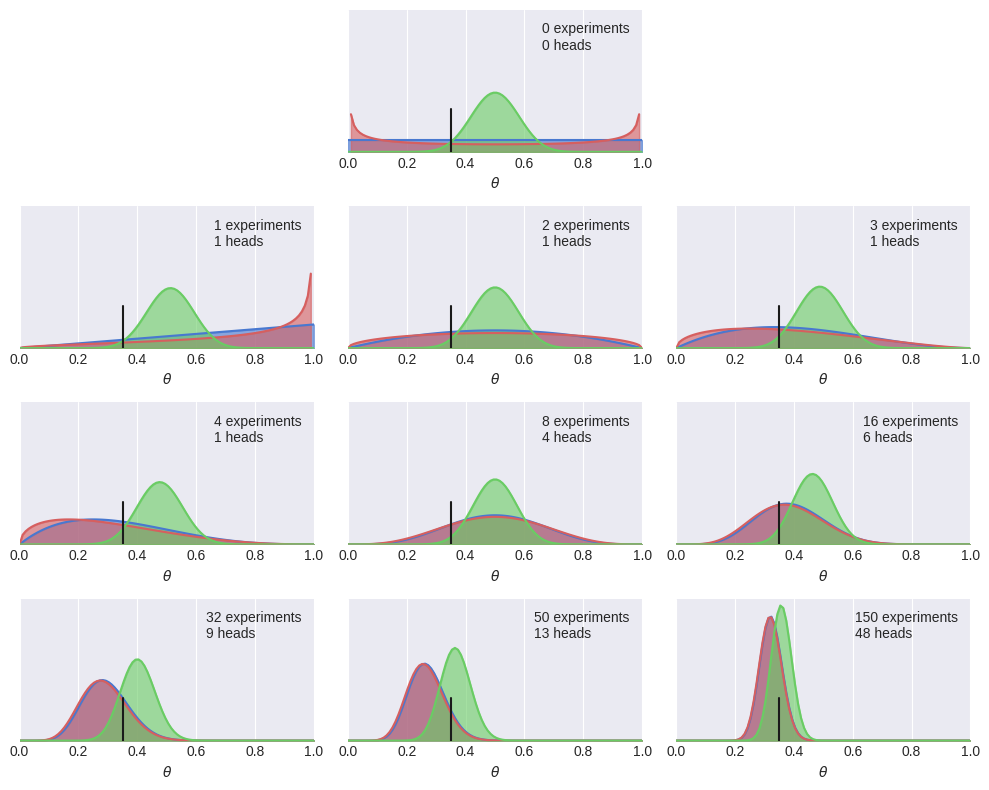

In [25]:
theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 8))
for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N, y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r"$\theta$")
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('B04958_01_05.png', dpi=300)

On the first line we have 0 experiments done, hence these curves are just our priors. We have three curves, one per prior:

* The blue one is a uniform prior. This is equivalent to saying that all the possible values for the bias are equally probable a priori.
* The red one is similar to the uniform. For the sake of this example we will just say that we are a little bit more confident that the bias is either 0 or 1 than the rest of the values.
* The green and last one is centered and concentrated around 0.5, so this prior is compatible with information indicating that the coin has more or less about the same chance of landing heads or tails. We could also say this prior is compatible with the belief that most coins are fair. While such a word is commonly used in Bayesian discussions we think is better to talk about models that are informed by data.

The rest of the subplots show posteriors $p(θ|y)$
 for successive experiments. Remember that we can think of posteriors as updated priors given the data. The number of experiments (or coin tosses) and the number of heads are indicated in each subplot's legend. There is also a black vertical line at 0.35 representing the true value for $θ$. Of course, in real problems we do not know this value, and it is here just for pedagogical reasons. This figure can teach us a lot about Bayesian analysis, so let's take a moment to understand it:

* The result of a Bayesian analysis is the posterior distribution, not a single value but a distribution of plausible values given the data and our model.
* The most probable value is given by the mode of the posterior (the peak of the distribution).
* The spread of the posterior is proportional to the uncertainty about the value of a parameter; the more spread the distribution, the less certain we are.
* Even when $\frac 1 2 = \frac 4 8 = 0.5$ , it is easy to see that the uncertainty we have in the first example is larger than in the second one because we have more data that supports our inference. This intuition is reflected in the posterior.
* Given a sufficiently large amount of data, two or more Bayesian models with different priors will tend to converge to the same result. In the limit of infinite data, no matter which prior we use, we will always get the same posterior. Remember that infinite is a limit and not a number, so from a practical point of view in some cases the infinite amount of data could be approximated with a really small number of data points.
* How fast posteriors converge to the same distribution depends on the data and the model. In the previous figure we can see that the blue and red posteriors look almost indistinguishable after only 8 experiments, while the red curve continues to be separated from the other two even after 150 experiments.
* Something not obvious from the figure is that we will get the same result if we update the posterior sequentially than if we do it all at once. We can compute the posterior 150 times, each time adding one more observation and using the obtained posterior as the new prior, or we can just compute one posterior for the 150 tosses at once. The result will be exactly the same. This feature not only makes perfect sense, also leads to a natural way of updating our estimations when we get new data, a situation common in many data analysis problems.

#### Influence of the prior and how to choose one

From the preceding example, it is clear that priors influence the result of the analysis. This is totally fine, priors are supposed to do this. Newcomers to Bayesian analysis (as well as detractors of this paradigm) are in general a little nervous about how to choose priors, because they do not want the prior to act as a censor that does not let the data speak for itself! That's okay, but we have to remember that data does not really speak; at best, data murmurs. Data only makes sense in the light of our models, including mathematical and mental models. There are plenty of examples in the history of science where the same data leads people to think differently about the same topics.

Some people fancy the idea of using non-informative priors (also known as flat, vague, or diffuse priors); these priors have the least possible amount of impact on the analysis. While it is possible to use them, in general, we can do better. Throughout this book we will follow the recommendations of Gelman, McElreath, Kruschke and many others, and we will prefer weakly informative priors. For many problems we often know something about the values a parameter can take, we may know that a parameter is restricted to being positive, or we may know the approximate range it can take, or if we expect the value to be close to zero or above/below some value. In such cases, we can use priors to put some weak information in our models without being afraid of being too pushy with our data. Because these priors work to keep the posterior distribution approximately within certain reasonable bounds, they are also know as regularizing priors.

Of course, it can also be possible to use informative priors. These are very strong priors that convey a lot of information. Depending on your problem, it could be easy or not to find this type of prior; for example, in my field of work (structural bioinformatics), people have been using all the prior information they can get, in Bayesian and nonBayesian ways, to study and especially predict the structure of proteins. This is reasonable because we have been collecting data from thousands of carefully designed experiments for decades and hence we have a great amount of trustworthy prior information at our disposal. Not using it would be absurd! So the take-home message is if you have reliable prior information, there is no reason to discard that information, including the non-nonsensical argument that not using information we trust is objective. Imagine if every time an automotive engineer has to design a new car, she has to start from scratch and re-invent the combustion engine, the wheel, and for that matter, the whole concept of a car. That is not the way things work.

Now we know that there are different kind of priors, but this probably doesn't make us less nervous about choosing among them. Maybe it would be better to not have priors at all. That would make things easier. Well, every model, Bayesian or not has some kind of priors in some way or another, even if the prior does not appear explicitly. In fact many results from frequentist statistics can be seen as special cases of a Bayesian model under certain circumstances, such as flat priors. Let's pay attention to the previous figure one more time. We can see that the mode (the peak of the posterior) of the blue posterior agrees with the expected value for $θ$ from a frequentist analysis:
$$\hat{\theta}=\frac y N$$


Notice that $\hat{\theta}$ is a point estimate (a number) and not a posterior distribution (or any other type of distribution for that matter). So notice that you can not really avoid priors, but if you include them in your analysis you will get a distribution of plausible values and not only the most probable one. Another advantage of being explicit about priors is that we get more transparent models, meaning more easy to criticize, debug (in a broad sense of the word), and hopefully improve. Building models is an iterative process; sometimes the iteration takes a few minutes, sometimes it could take years. Sometimes it will only involve you and sometimes people you do not even know. Reproducibility matters and transparent assumptions in a model contributes to it.

We are free to use more than one prior (or likelihood) for a given analysis if we are not sure about any special one. Part of the modeling process is about questioning assumptions, and priors are just that. Different assumptions will lead to different models, using data and our domain knowledge of the problem we will be able to compare models. Chapter 06, Model Comparison will be devoted to this issue.

### Communicating a Bayesian analysis

Now that we have the posterior, the analysis is finished and we can go home. Well, not yet! We probably need to communicate or summarize the results to others, or even record for later use by ourselves.

### Model notation and visualization

If you want to communicate the result, you may need, depending on your audience, to also communicate the model. A common notation to succinctly represent probabilistic models is as follows:

$θ \sim Beta(\alpha, \beta)$  
$y \sim Bin(n=1, p=\theta)$  


This is the model we use for the coin-flip example. As we may remember, the symbol $\sim$ indicates that the variable is a random variable distributed according to the distribution on the right, that is, $θ$ is distributed as a beta distribution with parameters $α$ and $β$ , and $y$ is distributed as a binomial with parameter $n=1$ and $p=\theta$. The very same model can be represented graphically using Kruschke's diagrams:

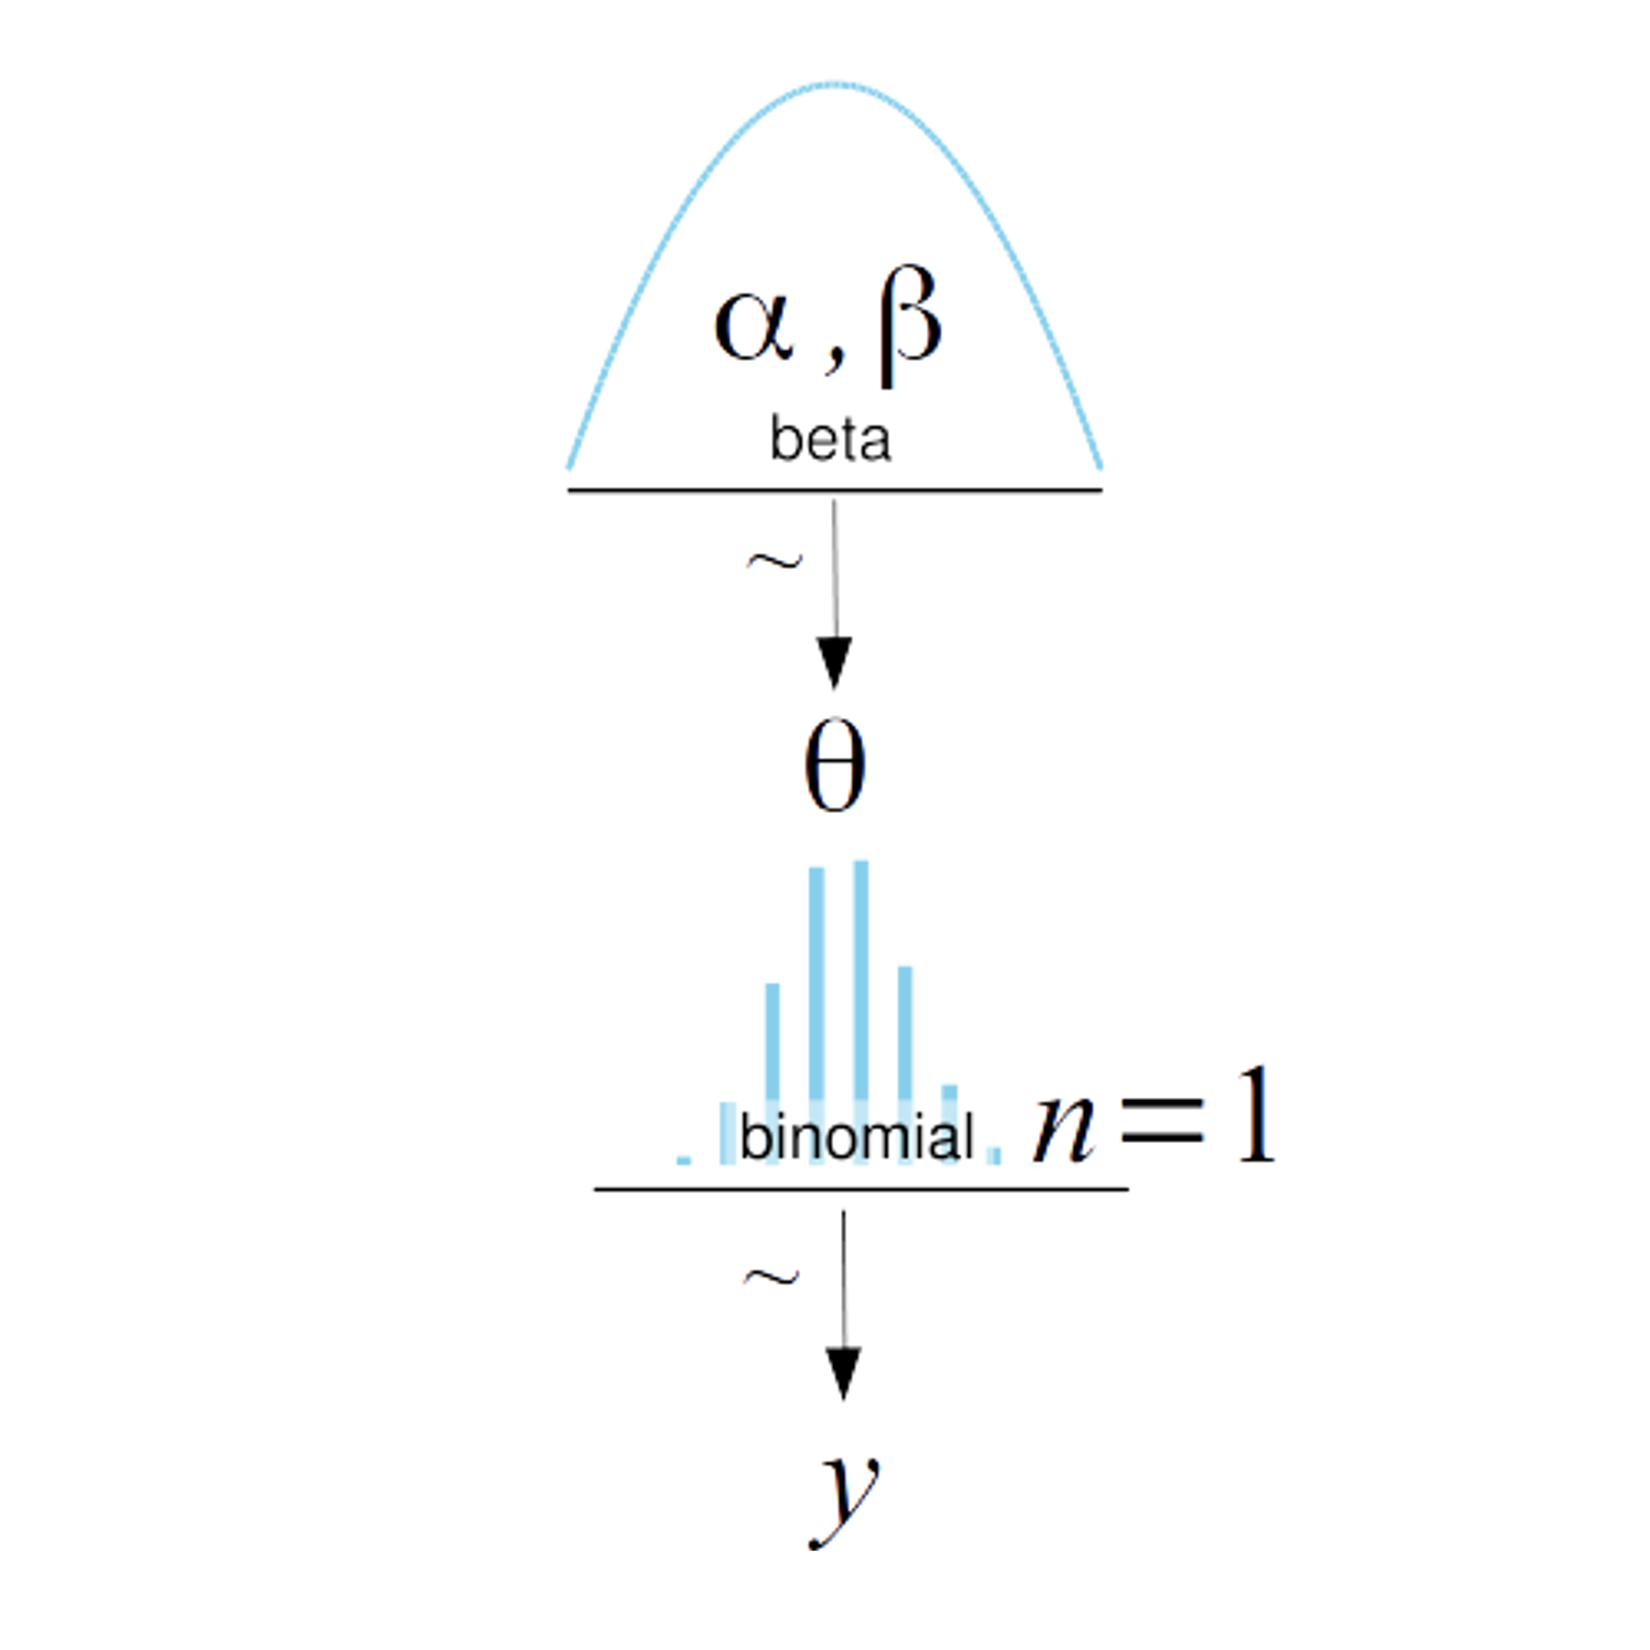

In [28]:
from IPython.display import Image
Image('pic2/B11197_01_06.png', height=500)

On the first level, we have the prior that generates the values for $θ$ , then the likelihood and, on the last line, the data. Arrows indicate the relationship between variables, and the $\sim$ symbol indicates the stochastic nature of the variables.

All Kruschke's diagrams in the book were made using the templates provided by Rasmus Bååth (http://www.sumsar.net/blog/2013/10/diy-kruschke-stylediagrams/). I would like to specially thanks him for making these templates available.

#### Summarizing the posterior

The result of a Bayesian analysis is the posterior distribution. This contains all the information about our parameters according to the data and the model. If possible, we can just show the posterior distribution to our audience. In general, it is also a good idea to report the mean (or mode or median) of the distribution to have an idea of the location of the distribution and some measure, such as the standard deviation, to have an idea of the dispersion and hence the uncertainty in our estimate. The standard deviation works well for normal-like distributions but can be misleading for other types of distributions, such as skewed ones. So intead, we could use the following approach.

#### Highest posterior density

A commonly used device to summarize the spread of a posterior distribution is to use a **Highest Posterior Density (HPD)** interval. An HPD is the shortest interval containing a given portion of the probability density. One of the most commonly used is the 95% HPD or 98% HPD, often accompanied by the 50% HPD. If we say that the 95% HPD for some analysis is [2-5], we mean that according to our data and model we think the parameter in question is between 2 and 5 with a 0.95 probability. This is a very intuitive interpretation, to the point that often people misinterpret frequentist confidence intervals as if they were Bayesian credible intervals. If you are familiar with the frequentist paradigm please note that both type of intervals have different interpretations. Performing a fully Bayesian analysis enables us to talk about the probability of a parameter having some value. While this is not possible in the frequentist framework since parameters are fixed by design, a frequentist confidence interval contains or does not contain the true value of a parameter. Another word of caution before we continue: there is nothing special about choosing 95% or 50% or any other value. They are just arbitrary commonly used values; we are free to choose the 91.37% HPD interval if we like. If you want to use the 95% value, it's OK; just remember that this is just a default value and any justification of which value we should use will be always context-dependent and not automatic.Computing the 95% HPD for a unimodal distribution is easy, since it is defined by the percentiles 2.5 and 97.5:

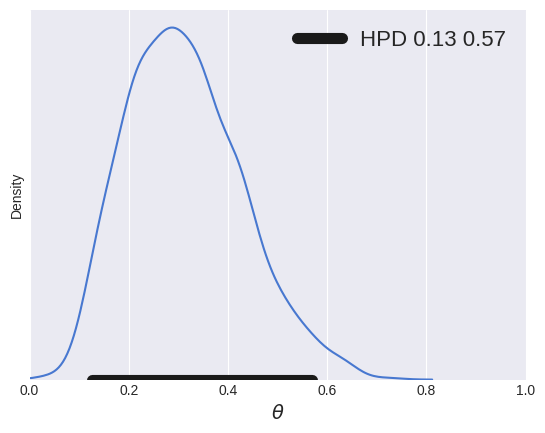

In [29]:
def naive_hpd(post):
    sns.kdeplot(post)
    HPD = np.percentile(post, [2.5, 97.5])
    plt.plot(HPD, [0, 0], label='HPD {:.2f} {:.2f}'.format(*HPD),
      linewidth=8, color='k')
    plt.legend(fontsize=16);
    plt.xlabel(r"$\theta$", fontsize=14)
    plt.gca().axes.get_yaxis().set_ticks([])


np.random.seed(1)
post = stats.beta.rvs(5, 11, size=1000)
naive_hpd(post)
plt.xlim(0, 1)
plt.savefig('B04958_01_07.png', dpi=300)

For a multi-modal distribution, the computation of the HPD is a little bit more complicated. If we apply our naive definition of the HPD to a mixture of Gaussians we will get the following:

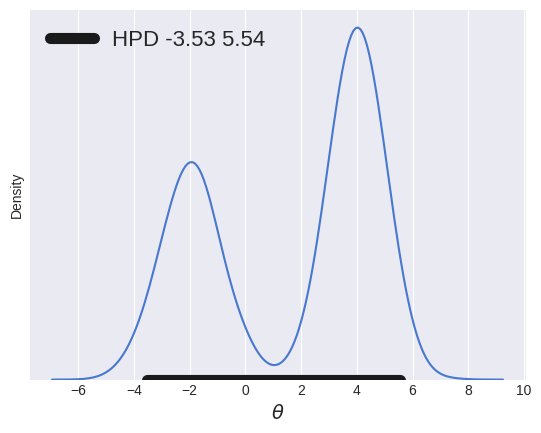

In [30]:
np.random.seed(1)
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)
mix_norm = np.concatenate((gauss_a, gauss_b))

naive_hpd(mix_norm)
plt.savefig('B04958_01_08.png', dpi=300)

As we can see in the preceding figure, the HPD computed in the naive way includes values with a low probability, approximately between [0, 2]. To compute the HPD in the correct way we will use the function plot_post, which you can download from the accompanying code that comes with the book:


from plot_post import plot_post
plot_post(mix_norm, roundto=2, alpha=0.05)
plt.legend(loc=0, fontsize=16)
plt.xlabel(r"$\theta$", fontsize=14)
plt.savefig('B04958_01_09.png', dpi=300, figsize=(5.5, 5.5))

As you can see from the preceding figure, the 95% HPD is composed of two intervals. plot_post also returns the values for the two modes.

#### Posterior predictive checks

One of the nice elements of the Bayesian toolkit is that once we have a posterior, it is possible to use the posterior to generate future data $y$, that is, predictions. Posterior predictive checks consist of comparing the observed data and the predicted data to spot differences between these two sets. The main goal is to check for auto-consistency. The generated data and the observed data should look more or less similar, otherwise there was some problem during the modeling or some problem feeding the data to the model. But even if we did not make any mistake, differences could arise. Trying to understand the mismatch could lead us to improve models or at least to understand their limitations. Knowing which part of our problem/data the model is capturing well and which it is not is valuable information even if we do not know how to improve the model. Maybe the model captures well the mean behavior of our data but fails to predict rare values. This could be problematic for us, or maybe we only care about the mean, so this model will be okay for us. The general aim will be not to declare that a model is false; instead we follow George Box's advice, all models are wrong, but some are useful. We just want to know which part of the model we can trust and try to test whether the model is a good fit for our specific purpose. How confident one can be about a model is certainly not the same across disciplines. Physics can study systems under highly controlled conditions using high-level theories, so models are often seen as good descriptions of reality. Other disciplines such as sociology and biology study complex, difficult to isolate systems, and models have a weaker epistemological status. Nevertheless, independently of which discipline you are working in, models should always be checked and posterior predictive checks together with ideas from exploratory data analysis are a good way to check our models.